In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import stft
from scipy.signal import spectrogram
from scipy.io import wavfile

### Spectrogram plotting script

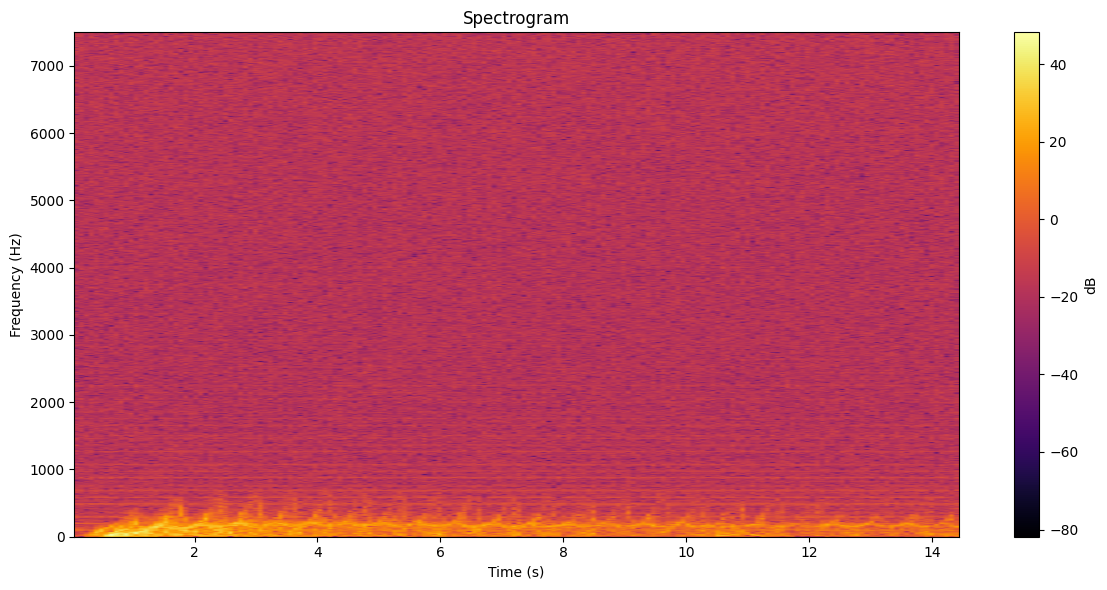

In [11]:

# Plot the original spectrogram# Load the WAV file
filename = 'WalkingData.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Code with some post-processing using Guassian Smoothing

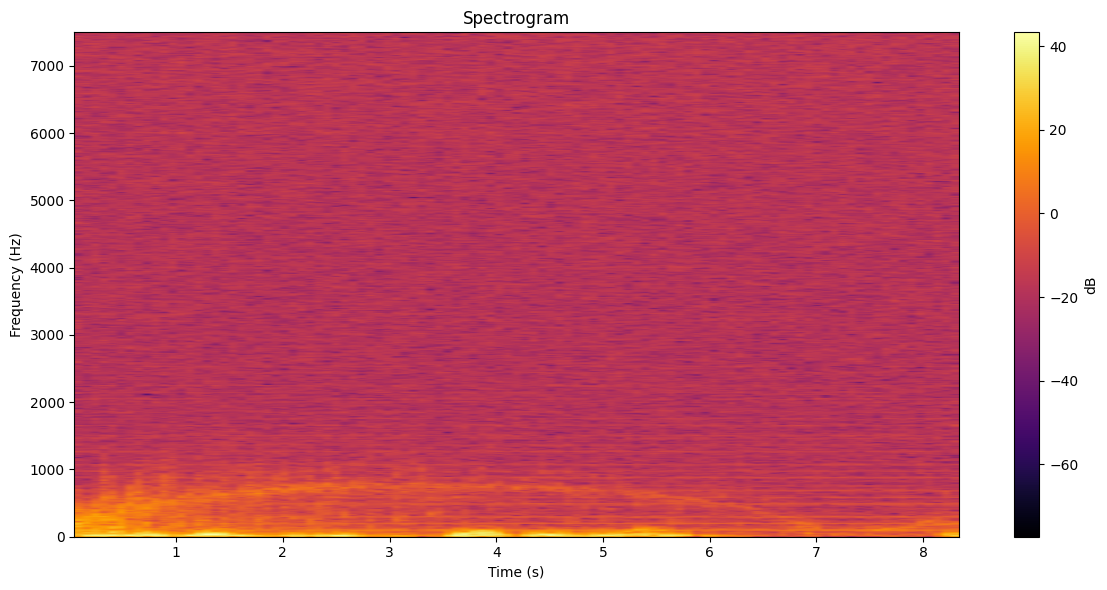

In [8]:
# Load the WAV file
filename = 'RunningData.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 0.5))

# Plot the spectrogram with improvements
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0,7500)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()